In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
initDf = pd.read_excel('data2.xlsx')

In [ ]:
initDf.head(24)

,Область,2015-2014,2014-2013
0,Вінницька,85.0,103.3
1,Волинська,85.0,95.0
2,Дніпропетровська,80.1,103.7
3,Донецька2,29.3,87.8
4,Житомирська,87.3,101.7
5,Закарпатська,85.5,103.4
6,Запорізька,82.1,100.8
7,Івано-Франківська,84.9,101.0
8,Київська,86.6,104.8
9,Кіровоградська,83.8,104.6


In [ ]:
df = initDf.drop(initDf.columns[[0, 1]], axis='columns')
df.head(30)

,2014-2013
0,103.3
1,95.0
2,103.7
3,87.8
4,101.7
5,103.4
6,100.8
7,101.0
8,104.8
9,104.6


In [ ]:
from scipy.cluster.hierarchy import single, cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

In [ ]:
av_seuclidean = linkage(df, 'average', 'seuclidean')
av_mahalanobis = linkage(df, 'average', 'mahalanobis')
av_chebyshev = linkage(df, 'average', 'chebyshev')

single_seuclidean = linkage(df, 'single', 'seuclidean')
single_mahalanobis = linkage(df, 'single', 'mahalanobis')
single_chebyshev = linkage(df, 'single', 'chebyshev')

complete_seuclidean = linkage(df, 'complete', 'seuclidean')
complete_mahalanobis = linkage(df, 'complete', 'mahalanobis')
complete_chebyshev = linkage(df, 'complete', 'chebyshev')

In [ ]:
Y = pdist(df)

In [ ]:
Z = cophenet(av_seuclidean, Y)
print(Z)

(0.9453105196867349, array([1.06485368, 0.08286583, 3.40741476, 0.4085923 , 0.02549718,
       0.4085923 , 0.4085923 , 0.26772039, 0.26772039, 3.40741476,
       0.4085923 , 1.06485368, 0.4085923 , 0.4085923 , 0.05463681,
       0.        , 0.4085923 , 0.05463681, 0.05463681, 0.4085923 ,
       0.        , 0.08286583, 0.01912288, 1.06485368, 0.        ,
       0.08286583, 0.01912288, 1.06485368, 1.06485368, 3.40741476,
       1.06485368, 1.06485368, 1.06485368, 1.06485368, 1.06485368,
       1.06485368, 3.40741476, 1.06485368, 0.2485975 , 1.06485368,
       1.06485368, 1.06485368, 1.06485368, 1.06485368, 1.06485368,
       1.06485368, 1.06485368, 1.06485368, 1.06485368, 1.06485368,
       0.58324799, 1.06485368, 1.06485368, 1.06485368, 0.58324799,
       3.40741476, 0.4085923 , 0.08286583, 0.4085923 , 0.4085923 ,
       0.26772039, 0.26772039, 3.40741476, 0.4085923 , 1.06485368,
       0.4085923 , 0.4085923 , 0.08286583, 0.08286583, 0.4085923 ,
       0.08286583, 0.08286583, 0.4085923 

In [ ]:
coph_matrix = np.zeros((3, 3))

coph_matrix[0][0] = cophenet(av_seuclidean, Y)[0]
coph_matrix[0][1] = cophenet(av_mahalanobis, Y)[0]
coph_matrix[0][2] = cophenet(av_chebyshev, Y)[0]

coph_matrix[1][0] = cophenet(single_seuclidean, Y)[0]
coph_matrix[1][1] = cophenet(single_mahalanobis, Y)[0]
coph_matrix[1][2] = cophenet(single_chebyshev, Y)[0]

coph_matrix[2][0] = cophenet(complete_seuclidean, Y)[0]
coph_matrix[2][1] = cophenet(complete_mahalanobis, Y)[0]
coph_matrix[2][2] = cophenet(complete_chebyshev, Y)[0]

print(coph_matrix)

[[0.94531052 0.94531052 0.94531052]
 [0.94729314 0.94729314 0.94729314]
 [0.93827831 0.93827831 0.93827831]]


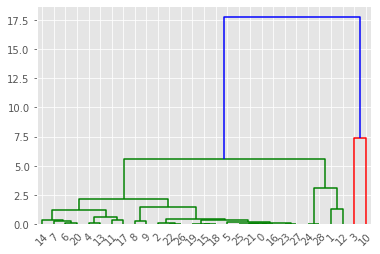

In [ ]:
dn = dendrogram(av_chebyshev, orientation='top')

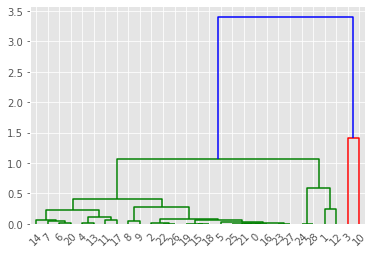

In [ ]:
dn = dendrogram(av_seuclidean, orientation='top')

In [ ]:
initDf.head(24)

,Область,2015-2014,2014-2013
0,Вінницька,85.0,103.3
1,Волинська,85.0,95.0
2,Дніпропетровська,80.1,103.7
3,Донецька2,29.3,87.8
4,Житомирська,87.3,101.7
5,Закарпатська,85.5,103.4
6,Запорізька,82.1,100.8
7,Івано-Франківська,84.9,101.0
8,Київська,86.6,104.8
9,Кіровоградська,83.8,104.6
